# <font color=darkblue>Collecte Des Données </font>

<font  color=black> **- Importation des bibliotheques** </font>

In [2]:
#pip install tweepy-3.10.0.tar.gz
import numpy as np
import tweepy
import pandas as pd
import csv
import re 
import string
import preprocessor as p
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

In [3]:
consumer_key = "cpjXAm9B2HiIUfhpLBQVkU5Nh"
consumer_secret = "F0SfKjb9o3F2IEVNDl3s4ovzcSrMk9UnlluoQD0pIvSEa3Ke9l"
access_key = "1230048817803821058-Pyh3dAp3HEyRvCFuY3tzG7fbYFbpc0"
access_secret = "RDFd7dJqsib0y7hE9Fi6Doiq8j15PaIJe8jeMd6lb8j5S"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
 
api = tweepy.API(auth,wait_on_rate_limit=True)

In [5]:
csvFile = open('tweets_NFT.csv', 'a')
csvWriter = csv.writer(csvFile)

In [6]:
search_words = "NFT"      # enter your words
new_search = search_words + " -filter:retweets"

In [7]:
#for tweet in tweepy.Cursor(api.search,q=new_search,count=100,
#                           lang="en",
#                           since_id=0).items(20000):
#    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'),tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])


In [8]:
data= pd.read_csv("tweets_NFT.csv", header=None)
data

,0,1,2,3
0,2022-05-07 15:37:17,"b""@Moonsie_NFT @FlipprTool @J777Crypto @darwin...",b'AhamadJim',b''
1,2022-05-07 15:37:17,b'@TheArtistEvie Thank you so much \xf0\x9f\x8...,b'ahmetaslan_nft',"b'Hatay, T\xc3\xbcrkiye'"
2,2022-05-07 15:37:17,b'Coinbase\xe2\x80\x99s NFT marketplace logs f...,b'kriztechnews',b''
3,2022-05-07 15:37:16,b'@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT lov...,b'RivaWinifred1',b''
4,2022-05-07 15:37:16,b'@SolChiefNFT @ChiruCatz @findersol_NFT @sego...,b'wawankentuzz',b'Indonesia'
...,...,...,...,...
11783,2022-05-07 14:43:47,b'@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman...,b'Keulmaille_NFT',"b'Los Angeles, CA'"
11784,2022-05-07 14:43:47,"b""@Hiraeth_NFT I was chosen. Now it's your tur...",b'JJJSS99',b''
11785,2022-05-07 14:43:46,b'Hi GM world. \nDrop your NFT only $xtz p...,b'raksawinn',b'\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9...
11786,2022-05-07 14:43:46,b'The first 5 items of the new collection have...,b'DarkbalanceShot',b'Turkey / \xc4\xb0zmir'


In [9]:
data.head(10)

,0,1,2,3
0,2022-05-07 15:37:17,"b""@Moonsie_NFT @FlipprTool @J777Crypto @darwin...",b'AhamadJim',b''
1,2022-05-07 15:37:17,b'@TheArtistEvie Thank you so much \xf0\x9f\x8...,b'ahmetaslan_nft',"b'Hatay, T\xc3\xbcrkiye'"
2,2022-05-07 15:37:17,b'Coinbase\xe2\x80\x99s NFT marketplace logs f...,b'kriztechnews',b''
3,2022-05-07 15:37:16,b'@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT lov...,b'RivaWinifred1',b''
4,2022-05-07 15:37:16,b'@SolChiefNFT @ChiruCatz @findersol_NFT @sego...,b'wawankentuzz',b'Indonesia'
5,2022-05-07 15:37:16,b'@YouByBFF Get your Free BFF PFP - read Bio @...,b'SandyTh95358612',b''
6,2022-05-07 15:37:16,b'@sol_giveaways @BlockBet_ @yili @ChubbyJiras...,b'Happydayoff4',b'Guangdong'
7,2022-05-07 15:37:16,b'@RealFlokiInu To mint @PandaGirlToken click ...,b'SFOLORUNSO',"b'Lagos, Nigeria'"
8,2022-05-07 15:37:16,"b""@RampageReXNFT @Acceptable890 we've been in ...",b'InstantToastETH',b''
9,2022-05-07 15:37:15,b'From what I see Bo Kucoin is doing all the w...,b'Crypto2954',b''


In [10]:
data.tail(10)

,0,1,2,3
11778,2022-05-07 14:43:48,b'@ape_jonnn Ayyy let\xe2\x80\x99s do it. Nft ...,b'Steezed0uteth',b'Playboy Mansion'
11779,2022-05-07 14:43:47,"b'You early guys, come check this out\nSomethi...",b'inyang_betty',b''
11780,2022-05-07 14:43:47,b'@Moonsie_NFT @FlipprTool @J777Crypto @darwin...,b'BartonMaical',b''
11781,2022-05-07 14:43:47,b'@Moonsie_NFT @FlipprTool @J777Crypto @darwin...,b'McphillipsgJ',b''
11782,2022-05-07 14:43:47,b'@MoonStepApp A beautiful project that I beli...,b'ukyo2022',b''
11783,2022-05-07 14:43:47,b'@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman...,b'Keulmaille_NFT',"b'Los Angeles, CA'"
11784,2022-05-07 14:43:47,"b""@Hiraeth_NFT I was chosen. Now it's your tur...",b'JJJSS99',b''
11785,2022-05-07 14:43:46,b'Hi GM world. \nDrop your NFT only $xtz p...,b'raksawinn',b'\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9...
11786,2022-05-07 14:43:46,b'The first 5 items of the new collection have...,b'DarkbalanceShot',b'Turkey / \xc4\xb0zmir'
11787,2022-05-07 14:43:45,"b'@AAXExchange Hurry, only 3 days to go! Come ...",b'laketreasuree',b''


In [11]:
data.isnull().values.any() 

False

In [12]:
data.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11788 entries, 0 to 11787
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       11788 non-null  object
 1   1       11788 non-null  object
 2   2       11788 non-null  object
 3   3       11788 non-null  object
dtypes: object(4)
memory usage: 368.5+ KB


# <font color=darkblue>Nettoyage Des Données </font>

In [14]:
data.to_csv("tweets_NFT2.csv", header=["Date & Time", "Content", "User", "Location"], index=False)

In [15]:
data= pd.read_csv("tweets_NFT2.csv")
data

,Date & Time,Content,User,Location
0,2022-05-07 15:37:17,"b""@Moonsie_NFT @FlipprTool @J777Crypto @darwin...",b'AhamadJim',b''
1,2022-05-07 15:37:17,b'@TheArtistEvie Thank you so much \xf0\x9f\x8...,b'ahmetaslan_nft',"b'Hatay, T\xc3\xbcrkiye'"
2,2022-05-07 15:37:17,b'Coinbase\xe2\x80\x99s NFT marketplace logs f...,b'kriztechnews',b''
3,2022-05-07 15:37:16,b'@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT lov...,b'RivaWinifred1',b''
4,2022-05-07 15:37:16,b'@SolChiefNFT @ChiruCatz @findersol_NFT @sego...,b'wawankentuzz',b'Indonesia'
...,...,...,...,...
11783,2022-05-07 14:43:47,b'@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman...,b'Keulmaille_NFT',"b'Los Angeles, CA'"
11784,2022-05-07 14:43:47,"b""@Hiraeth_NFT I was chosen. Now it's your tur...",b'JJJSS99',b''
11785,2022-05-07 14:43:46,b'Hi GM world. \nDrop your NFT only $xtz p...,b'raksawinn',b'\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9...
11786,2022-05-07 14:43:46,b'The first 5 items of the new collection have...,b'DarkbalanceShot',b'Turkey / \xc4\xb0zmir'


In [16]:
data.head(1).values.tolist()

[['2022-05-07 15:37:17',
  'b"@Moonsie_NFT @FlipprTool @J777Crypto @darwin_nft Don\'t miss this project! ! ! @nime_sak @kraigself519 @OpliRdew @jeskemarcos987 @dk_dkbk ."',
  "b'AhamadJim'",
  "b''"]]

In [17]:
new_location=data["Location"].str[1:]
new_content=data["Content"].str[1:]
new_user=data["User"].str[1:]

In [18]:
data["Location"]=new_location
data["Content"]=new_content
data["User"]=new_user

In [19]:
data

,Date & Time,Content,User,Location
0,2022-05-07 15:37:17,"""@Moonsie_NFT @FlipprTool @J777Crypto @darwin_...",'AhamadJim',''
1,2022-05-07 15:37:17,'@TheArtistEvie Thank you so much \xf0\x9f\x8d...,'ahmetaslan_nft',"'Hatay, T\xc3\xbcrkiye'"
2,2022-05-07 15:37:17,'Coinbase\xe2\x80\x99s NFT marketplace logs fe...,'kriztechnews',''
3,2022-05-07 15:37:16,'@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT love...,'RivaWinifred1',''
4,2022-05-07 15:37:16,'@SolChiefNFT @ChiruCatz @findersol_NFT @segon...,'wawankentuzz','Indonesia'
...,...,...,...,...
11783,2022-05-07 14:43:47,'@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman ...,'Keulmaille_NFT',"'Los Angeles, CA'"
11784,2022-05-07 14:43:47,"""@Hiraeth_NFT I was chosen. Now it's your turn...",'JJJSS99',''
11785,2022-05-07 14:43:46,'Hi GM world. \nDrop your NFT only $xtz pl...,'raksawinn','\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\...
11786,2022-05-07 14:43:46,'The first 5 items of the new collection have ...,'DarkbalanceShot','Turkey / \xc4\xb0zmir'


In [20]:
data['Location'].isnull().values.any()

False

In [21]:
data['Location'].head(10)

0                         ''
1    'Hatay, T\xc3\xbcrkiye'
2                         ''
3                         ''
4                'Indonesia'
5                         ''
6                'Guangdong'
7           'Lagos, Nigeria'
8                         ''
9                         ''
Name: Location, dtype: object

In [22]:
new_location=data["Location"].str[:-1]
data["Location"]=new_location
new_location=data["Location"].str[1:]
data["Location"]=new_location

In [23]:
new_user=data["User"].str[:-1]
data["User"]=new_user
new_user=data["User"].str[1:]
data["User"]=new_user

In [24]:
new_content=data["Content"].str[:-1]
data["Content"]=new_content
new_content=data["Content"].str[1:]
data["Content"]=new_content

In [25]:
data

,Date & Time,Content,User,Location
0,2022-05-07 15:37:17,@Moonsie_NFT @FlipprTool @J777Crypto @darwin_n...,AhamadJim,
1,2022-05-07 15:37:17,@TheArtistEvie Thank you so much \xf0\x9f\x8d\x80,ahmetaslan_nft,"Hatay, T\xc3\xbcrkiye"
2,2022-05-07 15:37:17,Coinbase\xe2\x80\x99s NFT marketplace logs few...,kriztechnews,
3,2022-05-07 15:37:16,@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT love ...,RivaWinifred1,
4,2022-05-07 15:37:16,@SolChiefNFT @ChiruCatz @findersol_NFT @segono...,wawankentuzz,Indonesia
...,...,...,...,...
11783,2022-05-07 14:43:47,@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman @...,Keulmaille_NFT,"Los Angeles, CA"
11784,2022-05-07 14:43:47,@Hiraeth_NFT I was chosen. Now it's your turn ...,JJJSS99,
11785,2022-05-07 14:43:46,Hi GM world. \nDrop your NFT only $xtz pls...,raksawinn,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...
11786,2022-05-07 14:43:46,The first 5 items of the new collection have b...,DarkbalanceShot,Turkey / \xc4\xb0zmir


In [26]:
data = data.replace(r'^\s*$', np.nan, regex=True)

In [27]:
data

,Date & Time,Content,User,Location
0,2022-05-07 15:37:17,@Moonsie_NFT @FlipprTool @J777Crypto @darwin_n...,AhamadJim,NaN
1,2022-05-07 15:37:17,@TheArtistEvie Thank you so much \xf0\x9f\x8d\x80,ahmetaslan_nft,"Hatay, T\xc3\xbcrkiye"
2,2022-05-07 15:37:17,Coinbase\xe2\x80\x99s NFT marketplace logs few...,kriztechnews,NaN
3,2022-05-07 15:37:16,@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT love ...,RivaWinifred1,NaN
4,2022-05-07 15:37:16,@SolChiefNFT @ChiruCatz @findersol_NFT @segono...,wawankentuzz,Indonesia
...,...,...,...,...
11783,2022-05-07 14:43:47,@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman @...,Keulmaille_NFT,"Los Angeles, CA"
11784,2022-05-07 14:43:47,@Hiraeth_NFT I was chosen. Now it's your turn ...,JJJSS99,NaN
11785,2022-05-07 14:43:46,Hi GM world. \nDrop your NFT only $xtz pls...,raksawinn,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...
11786,2022-05-07 14:43:46,The first 5 items of the new collection have b...,DarkbalanceShot,Turkey / \xc4\xb0zmir


In [28]:
data['Location'].isnull().values.any()

True

In [29]:
data['Location'].isnull().values.sum()

6360

In [30]:
data.isnull().sum().sum()

6360

In [31]:
data.fillna('Unknown', inplace=True)

In [32]:
data

,Date & Time,Content,User,Location
0,2022-05-07 15:37:17,@Moonsie_NFT @FlipprTool @J777Crypto @darwin_n...,AhamadJim,Unknown
1,2022-05-07 15:37:17,@TheArtistEvie Thank you so much \xf0\x9f\x8d\x80,ahmetaslan_nft,"Hatay, T\xc3\xbcrkiye"
2,2022-05-07 15:37:17,Coinbase\xe2\x80\x99s NFT marketplace logs few...,kriztechnews,Unknown
3,2022-05-07 15:37:16,@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT love ...,RivaWinifred1,Unknown
4,2022-05-07 15:37:16,@SolChiefNFT @ChiruCatz @findersol_NFT @segono...,wawankentuzz,Indonesia
...,...,...,...,...
11783,2022-05-07 14:43:47,@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman @...,Keulmaille_NFT,"Los Angeles, CA"
11784,2022-05-07 14:43:47,@Hiraeth_NFT I was chosen. Now it's your turn ...,JJJSS99,Unknown
11785,2022-05-07 14:43:46,Hi GM world. \nDrop your NFT only $xtz pls...,raksawinn,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...
11786,2022-05-07 14:43:46,The first 5 items of the new collection have b...,DarkbalanceShot,Turkey / \xc4\xb0zmir


In [33]:
newdata = data[['Location']]
for c in newdata:
    print(f'{c :-<500} {data[c].unique()}')

Location------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ ['Unknown' 'Hatay, T\\xc3\\xbcrkiye' 'Indonesia' ... 'Blockchain City'
 'Cikarang, West Java' 'Playboy Mansion']


In [34]:
test=data['Location'].str.contains('Unknown').value_counts()

<AxesSubplot:>

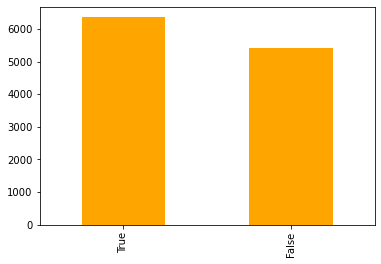

In [35]:
test.plot.bar(color="orange")

In [36]:
data = data.reindex(['User','Content','Date & Time','Location'], axis=1)
data

,User,Content,Date & Time,Location
0,AhamadJim,@Moonsie_NFT @FlipprTool @J777Crypto @darwin_n...,2022-05-07 15:37:17,Unknown
1,ahmetaslan_nft,@TheArtistEvie Thank you so much \xf0\x9f\x8d\x80,2022-05-07 15:37:17,"Hatay, T\xc3\xbcrkiye"
2,kriztechnews,Coinbase\xe2\x80\x99s NFT marketplace logs few...,2022-05-07 15:37:17,Unknown
3,RivaWinifred1,@SoulZ_NFT @GiveawaysSoulz @JukiverseNFT love ...,2022-05-07 15:37:16,Unknown
4,wawankentuzz,@SolChiefNFT @ChiruCatz @findersol_NFT @segono...,2022-05-07 15:37:16,Indonesia
...,...,...,...,...
11783,Keulmaille_NFT,@Kingofmidtown1 @ryan_talbot_ @bryanbrinkman @...,2022-05-07 14:43:47,"Los Angeles, CA"
11784,JJJSS99,@Hiraeth_NFT I was chosen. Now it's your turn ...,2022-05-07 14:43:47,Unknown
11785,raksawinn,Hi GM world. \nDrop your NFT only $xtz pls...,2022-05-07 14:43:46,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...
11786,DarkbalanceShot,The first 5 items of the new collection have b...,2022-05-07 14:43:46,Turkey / \xc4\xb0zmir


In [37]:
data['Content']=data['Content'].str.lower()
data

,User,Content,Date & Time,Location
0,AhamadJim,@moonsie_nft @flipprtool @j777crypto @darwin_n...,2022-05-07 15:37:17,Unknown
1,ahmetaslan_nft,@theartistevie thank you so much \xf0\x9f\x8d\x80,2022-05-07 15:37:17,"Hatay, T\xc3\xbcrkiye"
2,kriztechnews,coinbase\xe2\x80\x99s nft marketplace logs few...,2022-05-07 15:37:17,Unknown
3,RivaWinifred1,@soulz_nft @giveawayssoulz @jukiversenft love ...,2022-05-07 15:37:16,Unknown
4,wawankentuzz,@solchiefnft @chirucatz @findersol_nft @segono...,2022-05-07 15:37:16,Indonesia
...,...,...,...,...
11783,Keulmaille_NFT,@kingofmidtown1 @ryan_talbot_ @bryanbrinkman @...,2022-05-07 14:43:47,"Los Angeles, CA"
11784,JJJSS99,@hiraeth_nft i was chosen. now it's your turn ...,2022-05-07 14:43:47,Unknown
11785,raksawinn,hi gm world. \ndrop your nft only $xtz pls...,2022-05-07 14:43:46,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...
11786,DarkbalanceShot,the first 5 items of the new collection have b...,2022-05-07 14:43:46,Turkey / \xc4\xb0zmir


In [38]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [39]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['Content'] = data['Content'].apply(lambda text: cleaning_stopwords(text))
data['Content'].head()

0    @moonsie_nft @flipprtool @j777crypto @darwin_n...
1           @theartistevie thank much \xf0\x9f\x8d\x80
2    coinbase\xe2\x80\x99s nft marketplace logs few...
3    @soulz_nft @giveawayssoulz @jukiversenft love ...
4    @solchiefnft @chirucatz @findersol_nft @segono...
Name: Content, dtype: object

In [40]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data['Content']= data['Content'].apply(lambda x: cleaning_punctuations(x))
data['Content'].tail()

11783    kingofmidtown1 ryantalbot bryanbrinkman offsho...
11784    hiraethnft chosen its turn nburixx1 gktnft caw...
11785    hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...
11786    first 5 items new collection uploadednhttpstco...
11787    aaxexchange hurry 3 days go come visit mooneyx...
Name: Content, dtype: object

In [41]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
data['Content'] = data['Content'].apply(lambda x: cleaning_repeating_char(x))
data['Content'].tail()

11783    kingofmidtow1 ryantalbot bryanbrinkman offshoo...
11784    hiraethnft chosen its turn nburix1 gktnft cawanft
11785    hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...
11786    first 5 items new collection uploadednhttpstco...
11787    aaxexchange hurry 3 days go come visit mooneyx...
Name: Content, dtype: object

In [42]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
data['Content'] = data['Content'].apply(lambda x: cleaning_URLs(x))
data['Content'].tail()

11783    kingofmidtow1 ryantalbot bryanbrinkman offshoo...
11784    hiraethnft chosen its turn nburix1 gktnft cawanft
11785    hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...
11786    first 5 items new collection uploadednhttpstco...
11787    aaxexchange hurry 3 days go come visit mooneyx...
Name: Content, dtype: object

In [43]:
data

,User,Content,Date & Time,Location
0,AhamadJim,moonsienft flipprtool j777crypto darwinnft don...,2022-05-07 15:37:17,Unknown
1,ahmetaslan_nft,theartistevie thank much xf0x9fx8dx80,2022-05-07 15:37:17,"Hatay, T\xc3\xbcrkiye"
2,kriztechnews,coinbasexe2x80x99s nft marketplace logs fewer1...,2022-05-07 15:37:17,Unknown
3,RivaWinifred1,soulznft giveawayssoulz jukiversenft love bart...,2022-05-07 15:37:16,Unknown
4,wawankentuzz,solchiefnft chirucatz findersolnft segonogo hi...,2022-05-07 15:37:16,Indonesia
...,...,...,...,...
11783,Keulmaille_NFT,kingofmidtow1 ryantalbot bryanbrinkman offshoo...,2022-05-07 14:43:47,"Los Angeles, CA"
11784,JJJSS99,hiraethnft chosen its turn nburix1 gktnft cawanft,2022-05-07 14:43:47,Unknown
11785,raksawinn,hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...,2022-05-07 14:43:46,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...
11786,DarkbalanceShot,first 5 items new collection uploadednhttpstco...,2022-05-07 14:43:46,Turkey / \xc4\xb0zmir


# <font color=darkblue>Sentiment Analysis </font>

<font  color=black> **- TextBlob** </font>

In [44]:
def polarity_detection(text):
    return TextBlob(text).sentiment.polarity
def subjectivity_detection(text):
    return TextBlob(text).sentiment.subjectivity

In [45]:
polarity_detection("I hate this!")

-1.0

In [46]:
polarity_detection("Love it!")

0.625

In [47]:
subjectivity_detection("I don't like it")

0.0

In [48]:
subjectivity_detection("this is fine but I prefer this")

0.5

In [49]:
polarity=data["Content"].apply(polarity_detection)
subjectivity=data["Content"].apply(subjectivity_detection)

In [50]:
data_text_blob = data.copy(deep=True)

In [51]:
data_text_blob.insert(loc=4,
          column='Polarity',
          value=polarity)

In [52]:
data_text_blob.insert(loc=5,
          column='Subjectivity',
          value=subjectivity)

In [53]:
data_text_blob

,User,Content,Date & Time,Location,Polarity,Subjectivity
0,AhamadJim,moonsienft flipprtool j777crypto darwinnft don...,2022-05-07 15:37:17,Unknown,0.000000,0.000000
1,ahmetaslan_nft,theartistevie thank much xf0x9fx8dx80,2022-05-07 15:37:17,"Hatay, T\xc3\xbcrkiye",0.200000,0.200000
2,kriztechnews,coinbasexe2x80x99s nft marketplace logs fewer1...,2022-05-07 15:37:17,Unknown,0.000000,0.000000
3,RivaWinifred1,soulznft giveawayssoulz jukiversenft love bart...,2022-05-07 15:37:16,Unknown,0.500000,0.600000
4,wawankentuzz,solchiefnft chirucatz findersolnft segonogo hi...,2022-05-07 15:37:16,Indonesia,0.800000,0.400000
...,...,...,...,...,...,...
11783,Keulmaille_NFT,kingofmidtow1 ryantalbot bryanbrinkman offshoo...,2022-05-07 14:43:47,"Los Angeles, CA",0.000000,0.000000
11784,JJJSS99,hiraethnft chosen its turn nburix1 gktnft cawanft,2022-05-07 14:43:47,Unknown,0.000000,0.000000
11785,raksawinn,hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...,2022-05-07 14:43:46,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...,0.000000,0.000000
11786,DarkbalanceShot,first 5 items new collection uploadednhttpstco...,2022-05-07 14:43:46,Turkey / \xc4\xb0zmir,0.193182,0.393939


<font  color=black> **- Vader** </font>

In [54]:
sid_obj= SentimentIntensityAnalyzer()

In [55]:
def sentiment_dictionary(text):
    sentiment_dict = sid_obj.polarity_scores(text)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Sentence Overall Rated As", end = " ")
    if sentiment_dict['compound'] >= 0.05 :
            print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [56]:
sentiment_dictionary("Hello")

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Neutral


In [57]:
sentiment_dictionary("I love this")

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
sentence was rated as  0.0 % Negative
sentence was rated as  32.300000000000004 % Neutral
sentence was rated as  67.7 % Positive
Sentence Overall Rated As Positive


In [58]:
sentiment_dictionary("this is bad")

Overall sentiment dictionary is :  {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}
sentence was rated as  63.6 % Negative
sentence was rated as  36.4 % Neutral
sentence was rated as  0.0 % Positive
Sentence Overall Rated As Negative


In [59]:
def sentiment_dictionary2(text):
    sentiment_dict = sid_obj.polarity_scores(text)
    #print("Overall sentiment dictionary is : ", sentiment_dict)
    #print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    #print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    #print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
    #print("Sentence Overall Rated As", end = " ")
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"
    else :
        return "Neutral"

In [60]:
Sentiment=data["Content"].apply(sentiment_dictionary2)

In [61]:
data_vader = data.copy(deep=True)

In [62]:
data_vader.insert(loc=4,
          column='Sentiment',
          value=Sentiment)

In [63]:
data_vader

,User,Content,Date & Time,Location,Sentiment
0,AhamadJim,moonsienft flipprtool j777crypto darwinnft don...,2022-05-07 15:37:17,Unknown,Positive
1,ahmetaslan_nft,theartistevie thank much xf0x9fx8dx80,2022-05-07 15:37:17,"Hatay, T\xc3\xbcrkiye",Positive
2,kriztechnews,coinbasexe2x80x99s nft marketplace logs fewer1...,2022-05-07 15:37:17,Unknown,Neutral
3,RivaWinifred1,soulznft giveawayssoulz jukiversenft love bart...,2022-05-07 15:37:16,Unknown,Positive
4,wawankentuzz,solchiefnft chirucatz findersolnft segonogo hi...,2022-05-07 15:37:16,Indonesia,Positive
...,...,...,...,...,...
11783,Keulmaille_NFT,kingofmidtow1 ryantalbot bryanbrinkman offshoo...,2022-05-07 14:43:47,"Los Angeles, CA",Neutral
11784,JJJSS99,hiraethnft chosen its turn nburix1 gktnft cawanft,2022-05-07 14:43:47,Unknown,Neutral
11785,raksawinn,hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...,2022-05-07 14:43:46,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...,Positive
11786,DarkbalanceShot,first 5 items new collection uploadednhttpstco...,2022-05-07 14:43:46,Turkey / \xc4\xb0zmir,Neutral


[Text(0, 0, 'Negative'), Text(1, 0, 'Positive'), Text(2, 0, 'Neutral')]

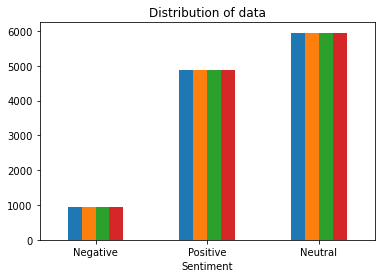

In [64]:
# Plotting the distribution for dataset.
ax = data_vader.groupby('Sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive','Neutral'], rotation=0)
# Storing data in lists.
#text, sentiment = list(df['text']), list(df['target'])

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

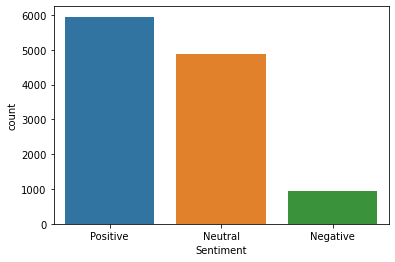

In [65]:
import seaborn as sns
sns.countplot(x='Sentiment', data=data_vader)

In [66]:
data_model=data_vader.loc[data_vader['Sentiment'].isin({"Positive","Negative"})]
data_model

,User,Content,Date & Time,Location,Sentiment
0,AhamadJim,moonsienft flipprtool j777crypto darwinnft don...,2022-05-07 15:37:17,Unknown,Positive
1,ahmetaslan_nft,theartistevie thank much xf0x9fx8dx80,2022-05-07 15:37:17,"Hatay, T\xc3\xbcrkiye",Positive
3,RivaWinifred1,soulznft giveawayssoulz jukiversenft love bart...,2022-05-07 15:37:16,Unknown,Positive
4,wawankentuzz,solchiefnft chirucatz findersolnft segonogo hi...,2022-05-07 15:37:16,Indonesia,Positive
5,SandyTh95358612,youbybff get free bff pfp read bio returnofzm...,2022-05-07 15:37:16,Unknown,Positive
...,...,...,...,...,...
11779,inyang_betty,early guys come check outnsomething huge comin...,2022-05-07 14:43:47,Unknown,Positive
11781,McphillipsgJ,moonsienft flipprtool j777crypto darwinnft lik...,2022-05-07 14:43:47,Unknown,Positive
11782,ukyo2022,moonstepapp beautiful project believe come bet...,2022-05-07 14:43:47,Unknown,Positive
11785,raksawinn,hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...,2022-05-07 14:43:46,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...,Positive


In [67]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6896 entries, 0 to 11787
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User         6896 non-null   object
 1   Content      6896 non-null   object
 2   Date & Time  6896 non-null   object
 3   Location     6896 non-null   object
 4   Sentiment    6896 non-null   object
dtypes: object(5)
memory usage: 323.2+ KB


In [68]:
data_model.shape

(6896, 5)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

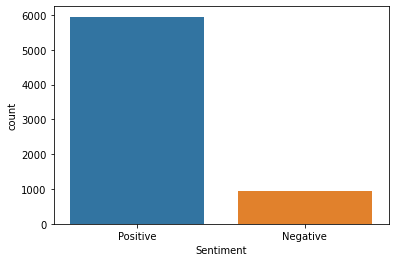

In [69]:
import seaborn as sns
sns.countplot(x='Sentiment', data=data_model)

In [70]:
data_model.loc[data_model["Sentiment"] == "Positive", "Sentiment"] = 1
data_model.loc[data_model["Sentiment"] == "Negative", "Sentiment"] = 0

C:\anaconda3\installationanaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\anaconda3\installationanaconda\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [71]:
data_model

,User,Content,Date & Time,Location,Sentiment
0,AhamadJim,moonsienft flipprtool j777crypto darwinnft don...,2022-05-07 15:37:17,Unknown,1
1,ahmetaslan_nft,theartistevie thank much xf0x9fx8dx80,2022-05-07 15:37:17,"Hatay, T\xc3\xbcrkiye",1
3,RivaWinifred1,soulznft giveawayssoulz jukiversenft love bart...,2022-05-07 15:37:16,Unknown,1
4,wawankentuzz,solchiefnft chirucatz findersolnft segonogo hi...,2022-05-07 15:37:16,Indonesia,1
5,SandyTh95358612,youbybff get free bff pfp read bio returnofzm...,2022-05-07 15:37:16,Unknown,1
...,...,...,...,...,...
11779,inyang_betty,early guys come check outnsomething huge comin...,2022-05-07 14:43:47,Unknown,1
11781,McphillipsgJ,moonsienft flipprtool j777crypto darwinnft lik...,2022-05-07 14:43:47,Unknown,1
11782,ukyo2022,moonstepapp beautiful project believe come bet...,2022-05-07 14:43:47,Unknown,1
11785,raksawinn,hi gm world ndrop nft xtz pls xe2x9cx8cxefxb8x...,2022-05-07 14:43:46,\xe0\xb8\x9b\xe0\xb8\xa3\xe0\xb8\xb0\xe0\xb9\x...,1


In [72]:
data_model['Sentiment'].unique()

array([1, 0], dtype=object)

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

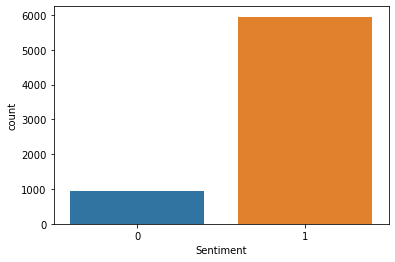

In [73]:
import seaborn as sns
sns.countplot(x='Sentiment', data=data_model)

In [74]:
data_model["Sentiment"]=data_model["Sentiment"].apply(pd.to_numeric)

C:\Users\HOUSSE~1\AppData\Local\Temp/ipykernel_13324/1860237478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_model["Sentiment"]=data_model["Sentiment"].apply(pd.to_numeric)


In [75]:
X=data_model.Content
y=data_model.Sentiment

In [76]:

#Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [77]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  61048


In [78]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [79]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       1.00      0.07      0.13        44
           1       0.88      1.00      0.94       301

    accuracy                           0.88       345
   macro avg       0.94      0.53      0.53       345
weighted avg       0.90      0.88      0.83       345



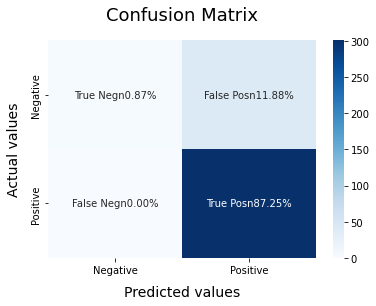

In [80]:
#Bernoulli Naive Bayes
import matplotlib.pyplot as plt
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

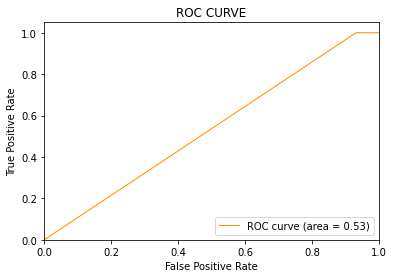

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.83      0.55      0.66        44
           1       0.94      0.98      0.96       301

    accuracy                           0.93       345
   macro avg       0.88      0.76      0.81       345
weighted avg       0.92      0.93      0.92       345



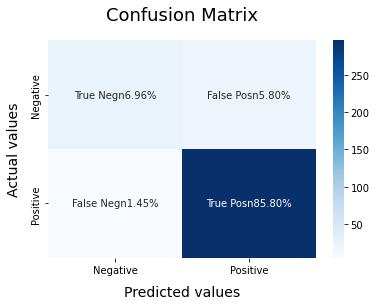

In [82]:
#Linear SVC
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

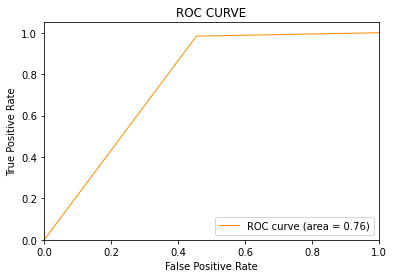

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.34      0.49        44
           1       0.91      0.99      0.95       301

    accuracy                           0.91       345
   macro avg       0.90      0.67      0.72       345
weighted avg       0.91      0.91      0.89       345



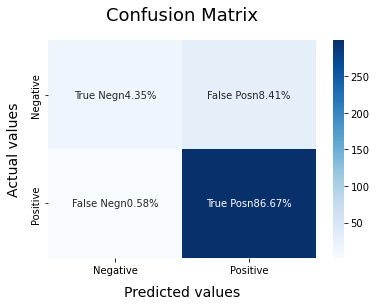

In [84]:
#Linear Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

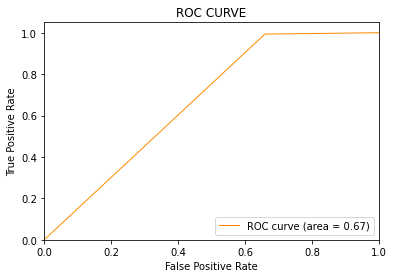

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()